In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

## Generating the data

We begin by generating data from a polynomial by also adding noise to the output, namely:

$$f^*(x) = 3x^2 + x + 5$$
$$y = f^*(x) + z\textrm{, where } z \sim \mathcal{N}(0, 30)$$


In [3]:
a, b, c = 3, 1, 5

N = 100
x = np.sort(10*np.random.rand(N,1), axis=0)
t = a*x**2 + b*x + c

N_test = 200
x_test = np.linspace(0,15,N_test)[:,None]
t_test =  a*x_test**2 + b*x_test + c

#add noise to the signal:
noise = np.random.normal(0,30,x.shape)
noise_test= np.random.normal(0,30,x_test.shape)

t=t+noise
t_test= t_test+noise_test

#note above we generated data from a guessian distirubtion using numpy 

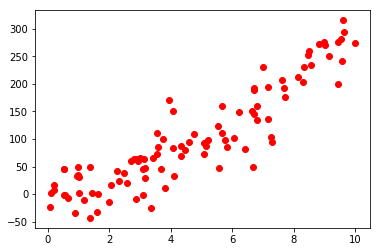

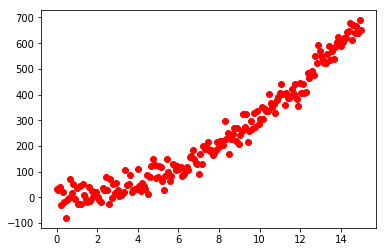

In [16]:
#plt.plot(x,y,'k')
plt.plot(x,t,'ro')
plt.show()
plt.plot(x_test,t_test,'ro')
plt.show()

## Fitting a linear model to the data
We can now fit a linear model, as learned in the last session, for this data: 


### Using scikit-learn

In [10]:
from sklearn.linear_model import LinearRegression

#implement linear regression
lm = LinearRegression()
lm.fit(x,t)
bias=lm.intercept_
weights=lm.coef_
print(bias,weights)

[-53.108932] [[31.86325845]]


### Using numpy.linalg

We currently have $X$ and $y$  and want to approximate 
$ f^*(x) \approx f(x;w)=w_0 + w_1*x $ (read: $y$ is approximated by ... )

$w_0$ is often also referred to as bias or intercept $b$. That is because it determines the *intercept of the approximated line with the y-axis*.

If we ignore the bias, for simplicity, we can calculate our linear regression as follows:

In [11]:
w_fit = np.linalg.lstsq(x, t)[0]
print(w_fit)

[[23.68586126]]


c:\users\steffi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


If we now want to include the bias term we simply add a column of ones:

In [12]:
x_with_bias= np.concatenate([np.ones((x.shape[0],1)), x], axis=1)
print(x_with_bias[0:5,:])

[[1.         0.04718856]
 [1.         0.05688507]
 [1.         0.15254971]
 [1.         0.20439132]
 [1.         0.36476057]]


This works because mathematically we can express our model as:

$$ f(\boldsymbol{x^{(i)}}; \boldsymbol{w})= w_0*x^i_0 + w_1*x^{(i)}_1 = w_0*1 + w_1*x^{(i)}_1 = \boldsymbol{w^T} \cdot  \boldsymbol{x^{(i)}} $$

$$ f(\boldsymbol{X'};\boldsymbol{w})= \boldsymbol{X'}\boldsymbol{w} $$

We can now fit our model without having to use scikit learn!

In [13]:
w_fit_with_bias = np.linalg.lstsq(x_with_bias, t)[0]
print(w_fit_with_bias)

[[-53.108932  ]
 [ 31.86325845]]


c:\users\steffi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


This are exactly the numbers that we calculated earlier!

# Testing on a Testset

Given these bias and weight terms we can now calculate the "line" for the test data:

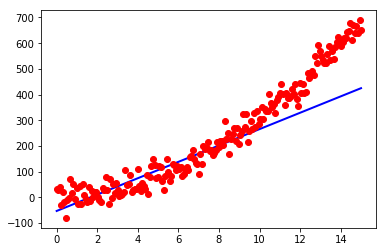

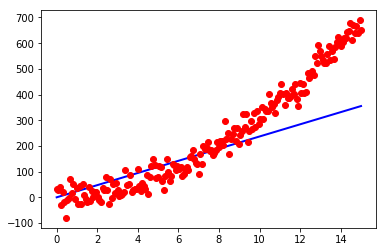

In [17]:
line= bias+weights[0]*x_test
plt.plot(x_test,line,'b-',linewidth=2)
plt.plot(x_test,t_test,'ro')
plt.show()

line_no_bias_numeric= w_fit*x_test
plt.plot(x_test,line_no_bias_numeric,'b-',linewidth=2)
plt.plot(x_test,t_test,'ro')
plt.show()


Observation: Using a bias term (the first figure) results in a better fit. However, overall, the linear model doesn't fit our data very well!

# Part 2: Non- Linear Linear Regression !

Linear Regression is a very simple model. So far we have seen how to fit a straight line to our input data. However, a line can't model curved functions, which leads to the poor performance seen above.

We can achieve nonlinearity by adding nonlinear transformations of the input, namely: $\phi(\boldsymbol{x})$

## Polynomial Linear Regression

Remember the generic form of a single-variable polynomial:
$$ a_0*1 + a_1*x + a_2 * x^2 + ... + a_k * x^k  $$

We can choose $\phi(x) = [1, x, x^2, x^3...x^k]$, and in this case, a linear combination: $\boldsymbol{w^T}\phi(x)$ could result in a nonlinear function of $x$.

Observation: we already know how to express the first 2 terms ($a_0 *1 + a_1 *x$): $\boldsymbol{X}'\boldsymbol{a}$. We achieved this by adding a column of 1's to X such that we could fit the weights.

For the polynomials we, therefore, only have to add more columns that represent each polynomial and then use linear regression to figure out the weights:

$$X' = 
\begin{bmatrix}
    \phi(x_{1})\\
    \phi(x_{2}) \\
    \dots \\
   \phi(x_{n})
\end{bmatrix}
=
\begin{bmatrix}
    1       & x_{1} & x_{1}^2 & \dots & x_{1}^k \\
    1       & x_{2} & x_{2}^2 & \dots & x_{2}^k \\
    \dots \\
   1       & x_{n} & x_{n}^2 & \dots & x_{n}^k
\end{bmatrix} $$

In general we can change (*pertubate*) the inputs to accomodate for more difficult functions!

In [18]:
#Creating the polynomial matrix up to order 10:
matrix = np.ones((len(x),11))
for row in range(len(matrix)):
    cur_x=x[row]
    for col in range(len(matrix[0])):
        matrix[row,col]=cur_x**col

With this, we can now fit a linear model to predict a curve!

In [55]:
# second order polynomial:
w_fit_2nd_order = np.linalg.lstsq(matrix[:,0:3], t)[0]
print(w_fit_2nd_order)
#4th orderpolynomial
w_fit_4th_order = np.linalg.lstsq(matrix[:,0:5], t)[0]
print(w_fit_4th_order)
#9th order polynomial
w_fit_9th_order = np.linalg.lstsq(matrix[:,0:10], t)[0]
print(w_fit_9th_order)

[[2.29915882]
 [6.67665057]
 [2.27981493]]
[[ 1.17616164]
 [ 6.43955692]
 [ 3.17574682]
 [-0.23183847]
 [ 0.01516795]]
[[-2.58203883e+01]
 [ 2.31873441e+02]
 [-3.93986325e+02]
 [ 2.84088929e+02]
 [-1.07139006e+02]
 [ 2.39158145e+01]
 [-3.31114747e+00]
 [ 2.81493525e-01]
 [-1.35074320e-02]
 [ 2.80059868e-04]]


c:\users\steffi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
c:\users\steffi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
c:\users\steffi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the i

In [59]:
#prepare test data
X_test= np.ones((len(x_test),2))
for row in range(len(x_test)):
    for col in range(len(X_test[0])):
        X_test[row,col]=x_test[row]**col
X_test_matrix_2nd_order=np.ones((len(x_test),3))
for row in range(len(x_test)):
    for col in range(len(X_test_matrix_2nd_order[0])):
        X_test_matrix_2nd_order[row,col]=x_test[row]**col
        
        
#4th order test matrix
X_test_matrix_4th_order=np.ones((len(x_test),5))
for row in range(len(x_test)):
    for col in range(len(X_test_matrix_4th_order[0])):
        X_test_matrix_4th_order[row,col]=x_test[row]**col
#9th order test matrix
X_test_matrix_9th_order=np.ones((len(x_test),10))
for row in range(len(x_test)):
    for col in range(len(X_test_matrix_9th_order[0])):
        X_test_matrix_9th_order[row,col]=x_test[row]**col




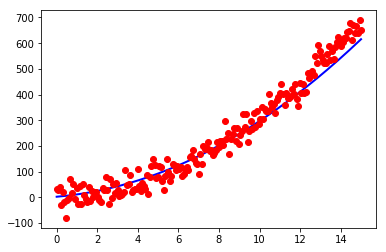

In [60]:
#show the fit
line= np.dot(X_test_matrix_2nd_order,w_fit_2nd_order)
plt.plot(x_test,line,'b-',linewidth=2)
plt.plot(x_test,t_test,'ro')
plt.show()

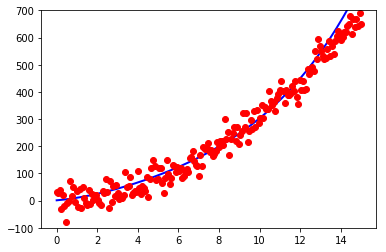

In [61]:
#show the fit
line= np.dot(X_test_matrix_4th_order,w_fit_4th_order)
plt.plot(x_test,line,'b-',linewidth=2)
plt.plot(x_test,t_test,'ro')
# plt.xlim((0, 10))
plt.ylim((-100, 700))
plt.show()

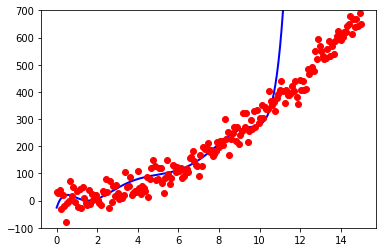

In [63]:
#show the fit
line= np.dot(X_test_matrix_9th_order,w_fit_9th_order)
plt.plot(x_test,line,'b-',linewidth=2)
plt.plot(x_test,t_test,'ro')
# plt.xlim((0, 10))
plt.ylim((-100, 700))
plt.show()

We now have three different models that seem to fit our data well: the linear, the second order and the 4th order polynomial. But which one is the best?

# Part 2: The Validation Set in Action: Find the most general fit

For this case we have the *validation set*. As we said last time, the validation set is here to test any *hyperparameters* of our model.

In this case the parameter is the *order of the polynomial*.

## The Loss Function as Generalisation Metric

First, we need some common evaluation metric. Last week we had looked at the *Least Square Loss Function*. For one data point this can be calculated as:

$$ \mathbf{L_n}(y_n,f(x_n; w_0,w_1)) = (y_n - f(x_n; w_0,w_1))^2 $$

That is, the squared difference between the predicted and the actual data point. 

For the whole dataset, we calculate this distance for each data point, sum it and then *average* over it: 

$$ \mathbf{L} = \frac{1}{N} \sum_{n=1}^N \mathbf{L_n}(y_n,f(x_n; w_0,w_1)) $$

We can calculate this loss for our training and test data given the different fits for our problem:

In [64]:
def calcLoss(y,X,W):
    N=len(y)
    mult=X@W
    #print(mult)
    loss= np.transpose(y-X@W) @ (y-X@W)
    avg_loss= 1 / N *loss
    return avg_loss
    

### Train Loss

In [70]:
#calc train loss
train_loss_linear= calcLoss(t,matrix[:,0:2],w_fit_with_bias)
print(train_loss_linear)
train_loss_2ndOrder= calcLoss(t,matrix[:,0:3],w_fit_2nd_order)
print(train_loss_2ndOrder)
train_loss_4thOrder= calcLoss(t,matrix[:,0:5],w_fit_4th_order)
print(train_loss_4thOrder)
train_loss_9thOrder= calcLoss(t,matrix[:,0:10],w_fit_9th_order)
print(train_loss_9thOrder)

[[1610.7599271]]
[[1208.15559215]]
[[1205.97875377]]
[[1093.15081614]]


### Test Loss

In [75]:
#calc test loss
test_loss_linear= calcLoss(t_test,X_test,w_fit_with_bias)
print(test_loss_linear)
test_loss_2ndOrder= calcLoss(t_test,X_test_matrix_2nd_order,w_fit_2nd_order)
print(test_loss_2ndOrder)
test_loss_4thOrder= calcLoss(t_test,X_test_matrix_4th_order,w_fit_4th_order)
print(test_loss_4thOrder)
test_loss_9thOrder= calcLoss(t_test,X_test_matrix_9th_order,w_fit_9th_order)
print(test_loss_9thOrder)

[[9590.16256924]]
[[1670.11518703]]
[[1646.24532045]]
[[6.25034217e+08]]


This implementation uses the vectorised version of the loss function: 

$$ \mathbf{L} = \frac{1}{N} (y-Xw)^T(y-Xw) $$

You can find a step by step solution as to how one derives the function to land at this solution in multiple online blogs or books such as *A first course in Machine Learning*.

## Making use of the validation set

We can see now that had we chosen the 9th order polynomial because it has the smallest training error we would not have generalised well.

However, as the test set should always only looked at **ONCE** at the end of training we don't have  a chance to go back and select a different model as that would mean that we are fitting to the test set. 

For this purpose we use a validation set in Machine Learning Applications. It tests the parameters of our model. 

In our case, this means that we should have a validation set that tests which order for the polynomial is the best fit:

In [76]:
#build initial data
x_val=np.sort(10*np.random.rand(100,1), axis=0)
t_val= 3*x_val**2 + x_val + 5 
val_noise=np.random.normal(0,30,x_val.shape)
t_val=t_val+val_noise

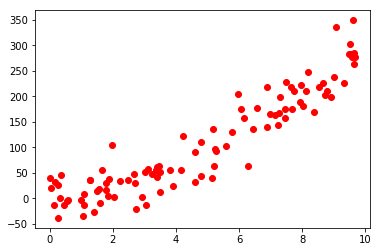

In [77]:

plt.plot(x_val,t_val,'ro')

plt.show()

In [81]:
#build bias and poly matrix:
poly_matrix_val= np.ones((len(x_val), 10))
for i in range(len(x_val)):
    for j in range(10):
        poly_matrix_val[i,j]=x_val[i]**j
        if i==1:
            print(x_val[i],poly_matrix_val[i,j],j)
        

[0.05809099] 1.0 0
[0.05809099] 0.05809099357757863 1
[0.05809099] 0.0033745635348302818 2
[0.05809099] 0.00019603174862895694 3
[0.05809099] 1.1387679050606246e-05 4
[0.05809099] 6.615215905922941e-07 5
[0.05809099] 3.842844647052656e-08 6
[0.05809099] 2.232346637115683e-09 7
[0.05809099] 1.2967923415961639e-10 8
[0.05809099] 7.53319555871159e-12 9


In [89]:
#train linear regression for each polynomial order

#3rd Order
w_fit_3rd_Order=np.linalg.lstsq(matrix[:,0:4], t)[0]

#4th Order
w_fit_4th_Order=np.linalg.lstsq(matrix[:,0:5], t)[0]

#5th Order
w_fit_5th_Order=np.linalg.lstsq(matrix[:,0:6], t)[0]

#6th Order
w_fit_6th_Order=np.linalg.lstsq(matrix[:,0:7], t)[0]

#7th Order
w_fit_7th_Order=np.linalg.lstsq(matrix[:,0:8], t)[0]

#8th Order
w_fit_8th_Order=np.linalg.lstsq(matrix[:,0:9], t)[0]

c:\users\steffi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
c:\users\steffi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys
c:\users\steffi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precisio

In [92]:
# calculate the Loss on the validation set

#linear
val_loss_linear = calcLoss(t_val,poly_matrix_val[:,0:2],w_fit_with_bias)

#2nd order
val_loss_2nd_Order = calcLoss(t_val,poly_matrix_val[:,0:3],w_fit_2nd_order)

#3rd order
val_loss_3rd_Order = calcLoss(t_val,poly_matrix_val[:,0:4],w_fit_3rd_Order)

#4th order
val_loss_4th_Order = calcLoss(t_val,poly_matrix_val[:,0:5],w_fit_4th_Order)

#5th order
val_loss_5th_Order = calcLoss(t_val,poly_matrix_val[:,0:6],w_fit_5th_Order)

#6th order
val_loss_6th_Order = calcLoss(t_val,poly_matrix_val[:,0:7],w_fit_6th_Order)

#7th order
val_loss_7th_Order = calcLoss(t_val,poly_matrix_val[:,0:8],w_fit_7th_Order)

#8th order
val_loss_8th_Order = calcLoss(t_val,poly_matrix_val[:,0:9],w_fit_8th_Order)

#9th order
val_loss_9th_Order = calcLoss(t_val,poly_matrix_val,w_fit_9th_order)

In [96]:
# plot the loss
y_axis= np.array([val_loss_linear[0],val_loss_2nd_Order[0],val_loss_3rd_Order[0],val_loss_4th_Order[0],val_loss_5th_Order[0],val_loss_6th_Order[0],val_loss_7th_Order[0],val_loss_8th_Order[0],val_loss_9th_Order[0]]).ravel()
x_axis=[1,2,3,4,5,6,7,8,9]

In [97]:
y_axis

array([1477.36229159,  993.32544962, 1002.29789651,  999.07662465,
       1064.31870336, 1117.31403723, 1229.6544464 , 1233.5403985 ,
       1255.80909154])

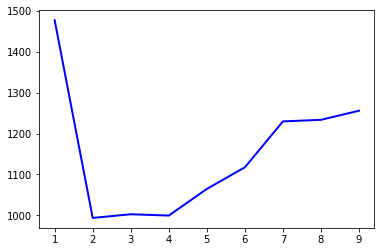

In [98]:
plt.plot(x_axis,y_axis,'b-',linewidth=2)

plt.show()

Given this graph, we can now determine that a second order polynomial is the best fit for our data!

# Part 3: Regularised Linear Regression

## Ridge Regression

In Regularised Linear Regression we penalise the values of the weights. This makes sense because if some weights take on too large numbers then that would mean that a small change in our data has massive consequences. When non-linear tranformation of the inputs are used, large weights can cause highly nonlinear models. This is not desirable, as we assume that our target functions are smooth (an assumption which helps us generalise to unseen data points).

The simplest form of regularisation is **Ridge Regression** also known as **L2 Regression**:

$$ \mathbf{L}_R = \frac{1}{N} \sum_{n=1}^N \mathbf{L_n}(y_n,f(x_n; w_0,w_1)) + \lambda \sum_{j=1}^M w_j^2 $$

Here, we penalise large weights by squaring them.  The parameter lambda oversees how much we take the regularisation into account. Chosen wisely, it will prevent overfitting but choosen badly it might go so far as to underfit the data. Concretely, if $\lambda=0$, then there's no regularizaion, while if $\lambda=\infty$, the magnitude of the regularizer would force the weights to become 0.

Take, for example, the 6th order polynomial that we learned earlier. We know that this is a model that overfits the data. So let's try to regularise it. Luckily, we don't have to train this ourselves: 

In [356]:
from sklearn import linear_model

def ridgeReg(l,X,y):
    ridge_reg = linear_model.Ridge (alpha = l)
    ridge_reg.fit(X,y) 
    ridge_weights=ridge_reg.coef_
    ridge_bias=ridge_reg.intercept_
    ridge_weight_vec= np.append(ridge_bias,ridge_weights)
    return(ridge_reg, ridge_weight_vec)
    #Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
          #normalize=False, random_state=None, solver='auto', tol=0.001)

In [357]:
regression_object01,weights01=ridgeReg(0.1,matrix[:,1:7],t)
regression_object05,weights05=ridgeReg(0.8,matrix[:,1:7],t)
regression_object001,weights001=ridgeReg(0.01,matrix[:,1:7],t)

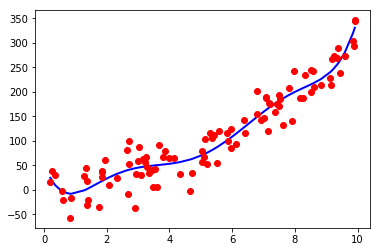

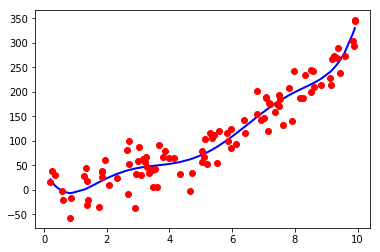

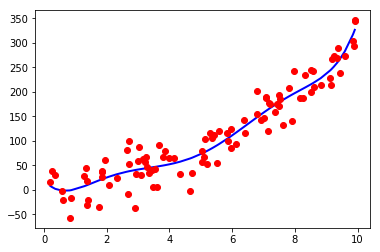

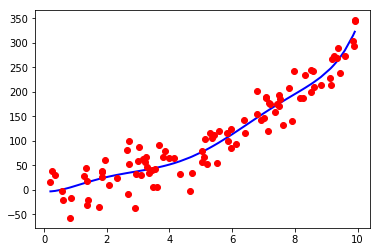

In [360]:
#plot this on the training set
#show the fit
line= np.dot(matrix[:,0:7],w_fit_6th_order)
plt.plot(x,line,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.show()
line= np.dot(matrix[:,0:7],weights001)
plt.plot(x,line,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.show()
line= np.dot(matrix[:,0:7],weights01)
plt.plot(x,line,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.show()
line= np.dot(matrix[:,0:7],weights05)
plt.plot(x,line,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.show()

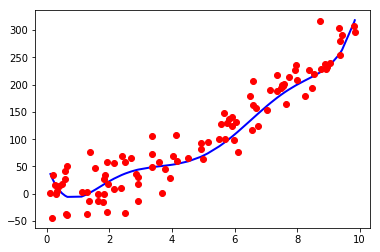

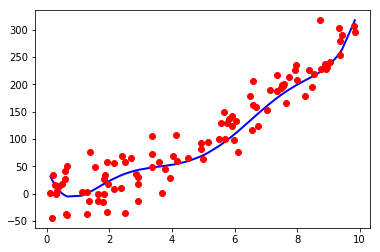

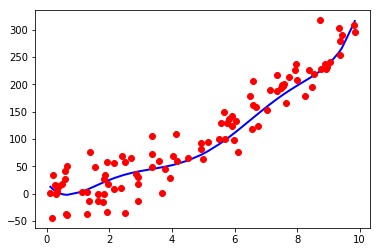

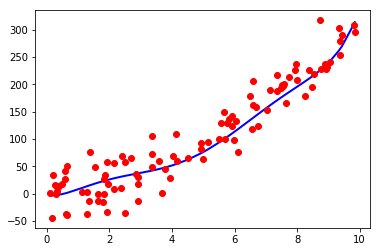

In [361]:
#plot this on the validation set
line= np.dot(poly_matrix_val[:,0:7],w_fit_6th_order)
plt.plot(x_val,line,'b-',linewidth=2)
plt.plot(x_val,t_val,'ro')
plt.show()
line= np.dot(poly_matrix_val[:,0:7],weights001)
plt.plot(x_val,line,'b-',linewidth=2)
plt.plot(x_val,t_val,'ro')
plt.show()
line= np.dot(poly_matrix_val[:,0:7],weights01)
plt.plot(x_val,line,'b-',linewidth=2)
plt.plot(x_val,t_val,'ro')
plt.show()
line= np.dot(poly_matrix_val[:,0:7],weights05)
plt.plot(x_val,line,'b-',linewidth=2)
plt.plot(x_val,t_val,'ro')
plt.show()


In [362]:
#calculate Loss
print(regression_object001.score(poly_matrix_val[:,1:7],t_val))
print(regression_object01.score(poly_matrix_val[:,1:7],t_val))
print(regression_object05.score(poly_matrix_val[:,1:7],t_val))

0.8968714745929043
0.9007557775319598
0.9015198214012368


We can see here that the score is not that different and that the smallest lambda actually gives us the best fit. While it might not make a huge difference here, regularisation is a technique that is wildly applicable and we will later on in the course see examples where it will make a huge difference.

### Good to know: Lasso Regression

Another form that you might have come across is L1 or Lasso Regression. There, instead of looking at the squared values we look at the overall magnitude that is:

$$ \mathbf{L}_L = \frac{1}{N} \sum_{n=1}^N \mathbf{L_n}(y_n,f(x_n; w_0,w_1)) + \lambda \sum_{j=1}^M |w_j| $$

This calculation encourages weights to go to 0. This encourages sparsity so that we don't have to calculate everything for all parameters but some columns will simply be 0. It is again regulated by the parameter lambda.

The code looks very similar to the previous regularisation technique:

In [363]:

def lassoReg(l,X,y):
    lasso_reg = linear_model.Lasso (alpha = l)
    lasso_reg.fit(X,y) 
    lasso_weights=ridge_reg.coef_
    lasso_bias=ridge_reg.intercept_
    lasso_weight_vec= np.append(lasso_bias,lasso_weights)
    return(lasso_reg, lasso_weight_vec)


In [366]:
reg_obj,lasso_weights=lassoReg(0.5,matrix[:,1:7],t)
print(lasso_weights)

[ 7.68690019e+00 -2.74263661e+01  2.11650030e+01 -2.77799796e+00
 -2.23974482e-01  7.59240684e-02 -4.13077805e-03]


c:\users\steffi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


If we now look at the weights we can see that the weight increasinlgy goes to 0 for the higher orders, especially the 6th order.  This sply underlines our above findings that a 6th order is not needed to approximate the problem accurately.

# Exercises

In the following exercises you will learn to fit a polynomial linear regression model and use regularisation.

1) Load the data from TODO PRESENT LINK  and import it to python.

2) Split the data into train, validation and test set. Use the raios that were provided last time.x

3) Visualise the data in the training set.

4) Augment the x_values of each set up to the 10th order. That is, create a matrix where the first column is the bias (all 1s), the second column is x, the third x^2 up until x^10

5) Train  linear regresion models **for each** order

6) Use the validation set to find the best order

7) Visualise your findings.

8) (optional) Take the model for the 10th order and perform regularisation on it. You can choose to use Lasso or Ridge Regression and play around with the parameter lambda. What is the best score you can achieve?